In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
from divers import plot_confusion_matrix

In [5]:
import sys
sys.path.append('./sompyLatmos/')     # Chemin du package
from sompy import SOMFactory
from sompy import SOMData

**graine aléatoire** (Pour assurer la reproductivié de l'expérience)

In [6]:
seed = 0 
np.random.seed(seed)

### Chargement et mise en forme des données

In [7]:
#from lettresZEtF import splitNlabs,  
from lettresZEtF import Zcreadata, Fcreadata
from lettresZEtF import lettreplot

**Choix de la répartition et du nombre de données** 

In [8]:
N  = 500; # Taille des donnees
strChoixDeLaForme = 'F'
#strChoixDeLaForme = 'Z'

#### Creation du jeu de donnees d'apprentissage et de leurs structures

In [9]:
if strChoixDeLaForme == 'Z':
    classnames = ['T','B','D'];
    # 'T' correspond à la bar du haut comme Top,
    # 'B', à celle du bas comme Bottom et
    # 'D' à la Diagonale
    data, data_labels, comp_names = Zcreadata(N,
                                   classnames=classnames)
elif strChoixDeLaForme == 'F':
    classnames = ['T','M','L'];
    # 'T' correspond à la bar du haut 
    # 'M', à celle du Milieu et
    # 'L' à la bar gauche, comme Left
    data, data_labels, comp_names = Fcreadata(N, 
                                   classnames=classnames)
masque = np.ones(data.shape[1])

#### Affichage des données

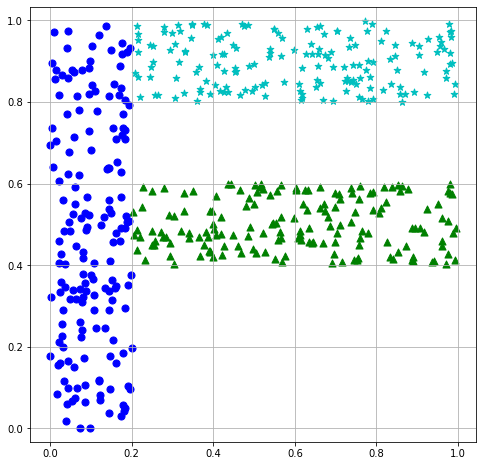

In [10]:
plt.figure(figsize=(8,8))
lettreplot(data)
plt.grid()
plt.axis('equal') ;

**Création d'un objet sData**

In [11]:
sData = SOMData(data,      # les données 
                comp_names,# les noms des variables
                data_labels,# les potentielles étiquettes 
                normalization = "var")

**Affichage des T-SNE**

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.134697
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 62.4426231, gradient norm = 0.5067136 (50 iterations in 0.111s)
[t-SNE] Iteration 100: error = 59.9962349, gradient norm = 0.5068890 (50 iterations in 0.140s)
[t-SNE] Iteration 150: error = 59.2962570, gradient norm = 0.5128760 (50 iterations in 0.108s)
[t-SNE] Iteration 200: error = 58.6617584, gradient norm = 0.4993739 (50 iterations in 0.126s)
[t-SNE] Iteration 250: error = 57.6334457, gradient norm = 0.5268539 (50 iterations in 0.108s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.633446
[t-SNE] Iteration 300: error = 0.5975778, gradient norm = 0.0019504 (50 iterations in 0.124s)
[t-SNE] Iteration 350: error = 0.4536227, gradient norm = 0.0005952 (

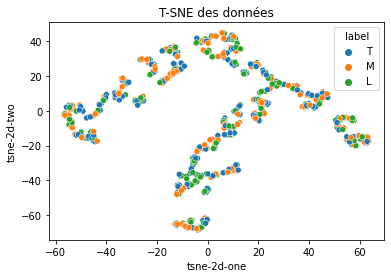

In [12]:
sData.plot_tsne()

### Création de la carte et apprentissage

#### Création d'une carte topologique (objet sm)

In [13]:
#mapsize=(1,20) 
#mapsize=(1,30) 
mapsize=(7,7) 

#mapsize=(3,7)   # a changer -> [nombre de lignes, nombre de colonnes]
sm = SOMFactory().build(sData, 
                        mapsize=mapsize,
                        normalization = None, 
                        initialization='pca', 
                        #initialization='random', 
                        neighborhood ='gaussian',
                        #neighborhood ='bubble',
                        radius_train ='linear', 
                        #radius_train ='power_series', 
                        #radius_train ='inverse_of_time', 
                        name='une lettre',
                        #lattice='rect',
                        lattice='hexa',
                        mask=masque,
                        components_to_plot=((0,1),))

In [14]:
SOMFactory

sompy.SOMFactory

In [15]:
SOMFactory().build

<function sompy.SOMFactory.build(sData, mapsize=None, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', radius_train='linear', name='sompyMap', components_to_plot=None)>

#### Entraînement de la carte

Training ...
 Rough training...
radius_ini: 3.000 , radius_final: 1.000, trainlen: 4

Epoch : 0 qErr : 0.4932  tErr : 0.7000


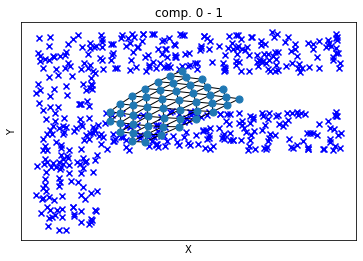

Epoch : 1 qErr : 0.3359  tErr : 0.7460


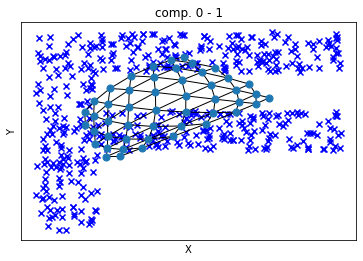

Epoch : 2 qErr : 0.2291  tErr : 0.7620


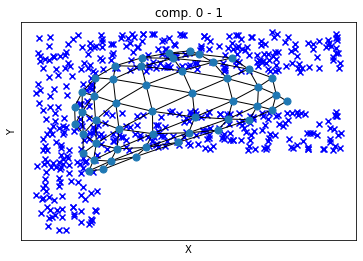

Epoch : 3 qErr : 0.1481  tErr : 0.7300


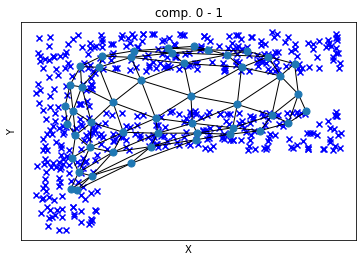

Finetune training
radius_ini: 1.250 , radius_final: 0.200, trainlen: 20

Epoch : 0 qErr : 0.1730  tErr : 0.7640


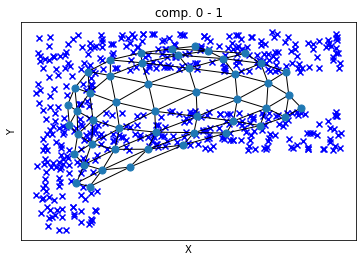

Epoch : 1 qErr : 0.1640  tErr : 0.7500


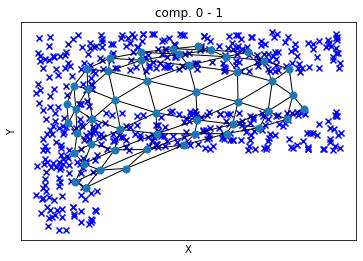

Epoch : 2 qErr : 0.1565  tErr : 0.7520


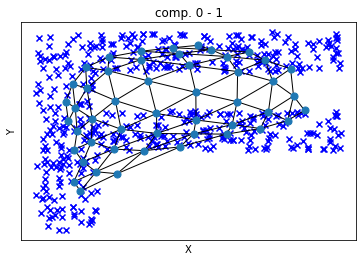

Epoch : 3 qErr : 0.1514  tErr : 0.7460


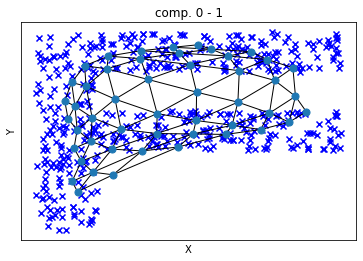

Epoch : 4 qErr : 0.1450  tErr : 0.7440


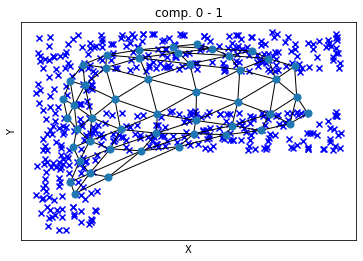

Epoch : 5 qErr : 0.1400  tErr : 0.7400


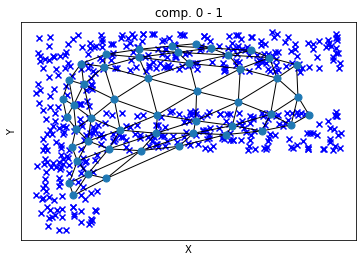

Epoch : 6 qErr : 0.1350  tErr : 0.7320


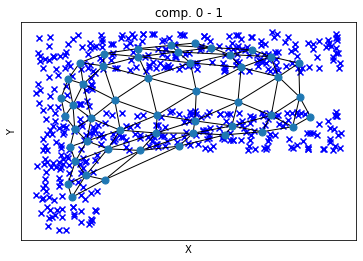

Epoch : 7 qErr : 0.1307  tErr : 0.7360


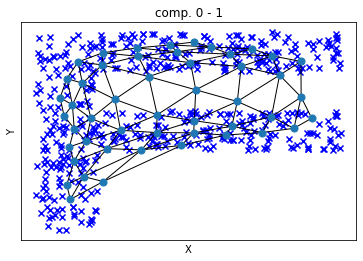

Epoch : 8 qErr : 0.1268  tErr : 0.7340


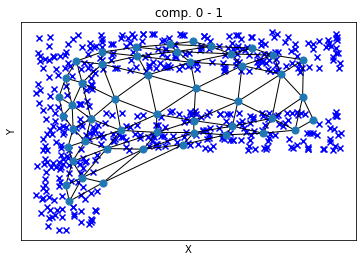

Epoch : 9 qErr : 0.1222  tErr : 0.7320


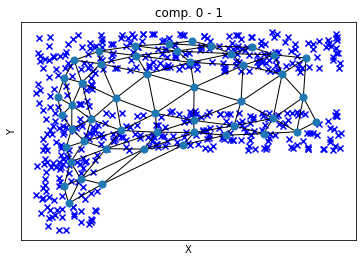

Epoch : 10 qErr : 0.1181  tErr : 0.7240


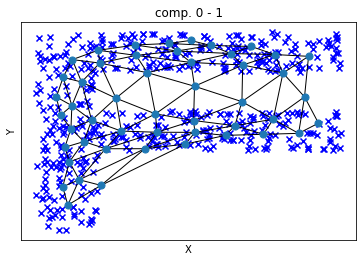

Epoch : 11 qErr : 0.1126  tErr : 0.7220


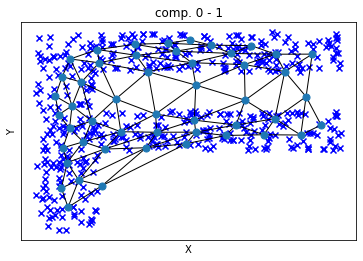

Epoch : 12 qErr : 0.1066  tErr : 0.7180


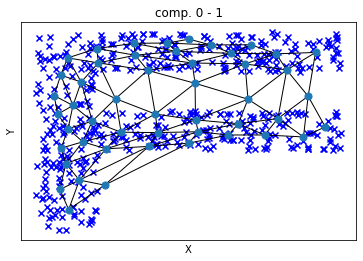

Epoch : 13 qErr : 0.1019  tErr : 0.7260


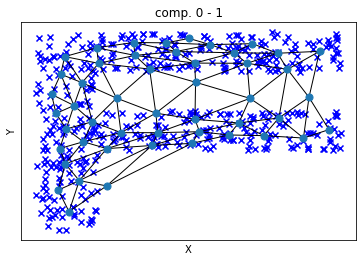

Epoch : 14 qErr : 0.0980  tErr : 0.7260


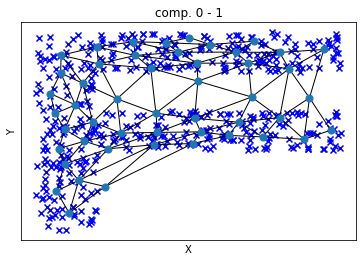

Epoch : 15 qErr : 0.0946  tErr : 0.7300


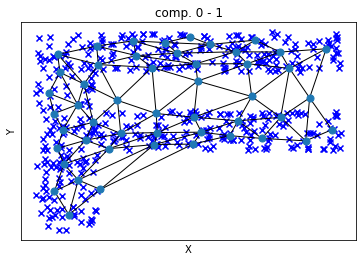

Epoch : 16 qErr : 0.0915  tErr : 0.7400


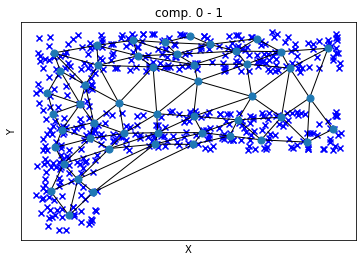

Epoch : 17 qErr : 0.0897  tErr : 0.7440


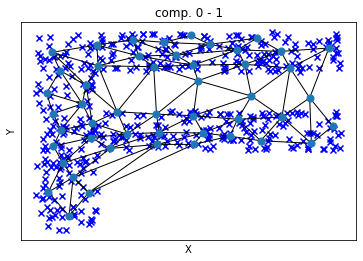

Epoch : 18 qErr : 0.0892  tErr : 0.7400


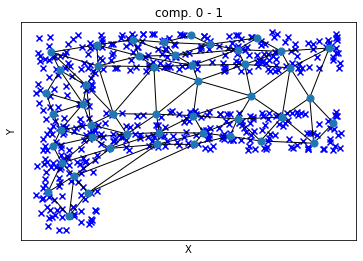

Epoch : 19 qErr : 0.0892  tErr : 0.7340


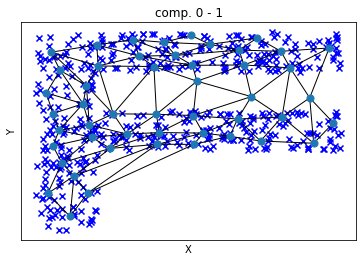

In [16]:
sm.train(n_job=1, 
         verbose=None, 
         train_rough_len=4, 
         train_rough_radiusin=3,
         train_rough_radiusfin=1,
         train_finetune_len=20,
         train_finetune_radiusin=1.25,
         train_finetune_radiusfin=0.2,
         watch_evolution = True)

In [17]:
from scipy.stats import gmean

In [18]:
gmean([ 0.1844 ,0.1260])

0.15242834382095743

In [19]:
gmean([ 0.1313 ,0.1440])

0.13750345450205967

**Affichage des T-SNE**

In [20]:
#sm.plot_tsne()

#### Affichages graphiques :

 - **Affichage de la carte**

In [21]:
from mapview import View2D
view2D  = View2D(16,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;

<Figure size 432x288 with 0 Axes>

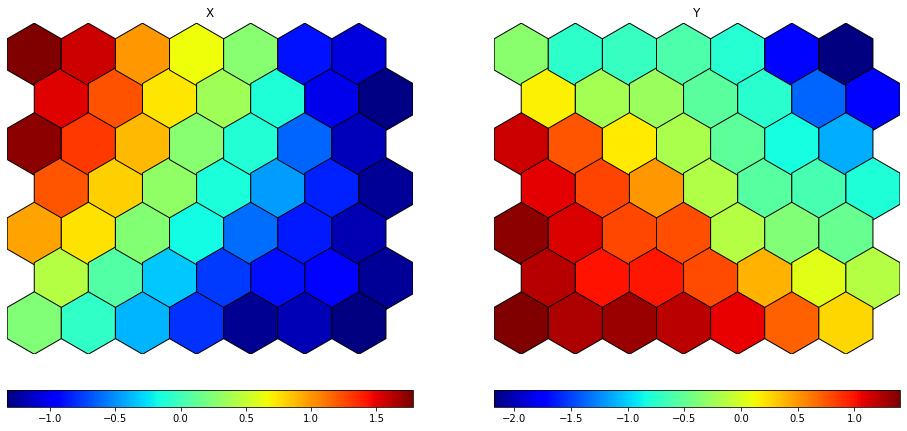

In [22]:
view2D.show(sm, col_sz=2, which_dim="all", denormalize=True) ; 

 - **Affichage de la carte avec etiquettes (les indices des neurones)**

<Figure size 432x288 with 0 Axes>

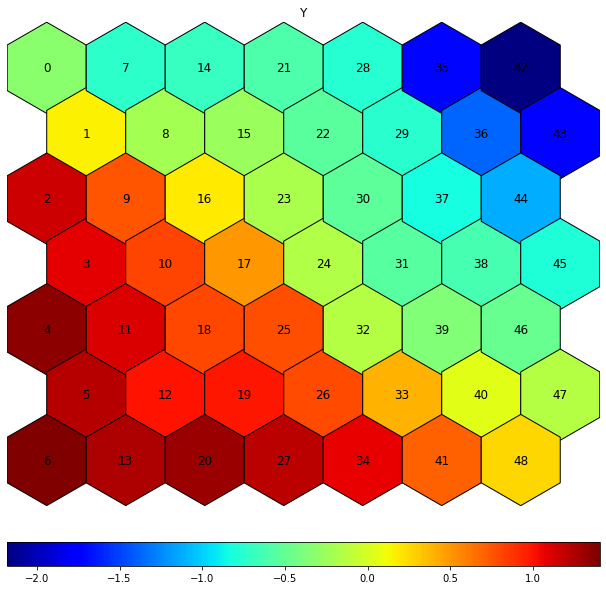

In [23]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=1, denormalize=True, labelsize=12) ; 

<Figure size 432x288 with 0 Axes>

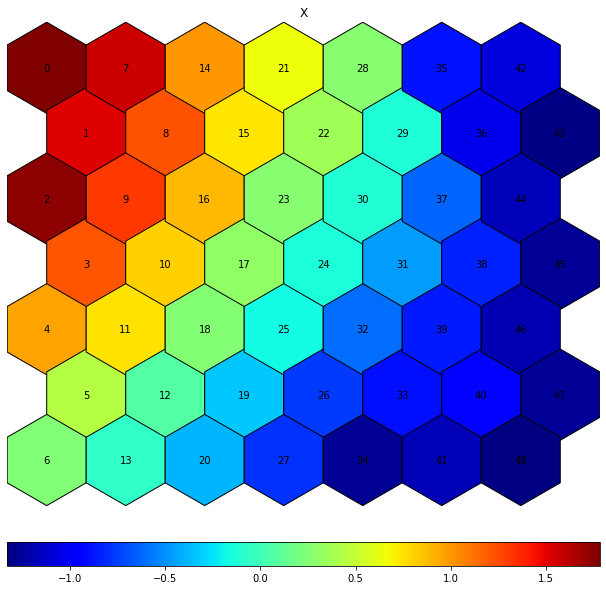

In [24]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=1, which_dim=0, denormalize=True, labelsize=10) ; 

 - **Affichage de la carte avec les cardinalités**

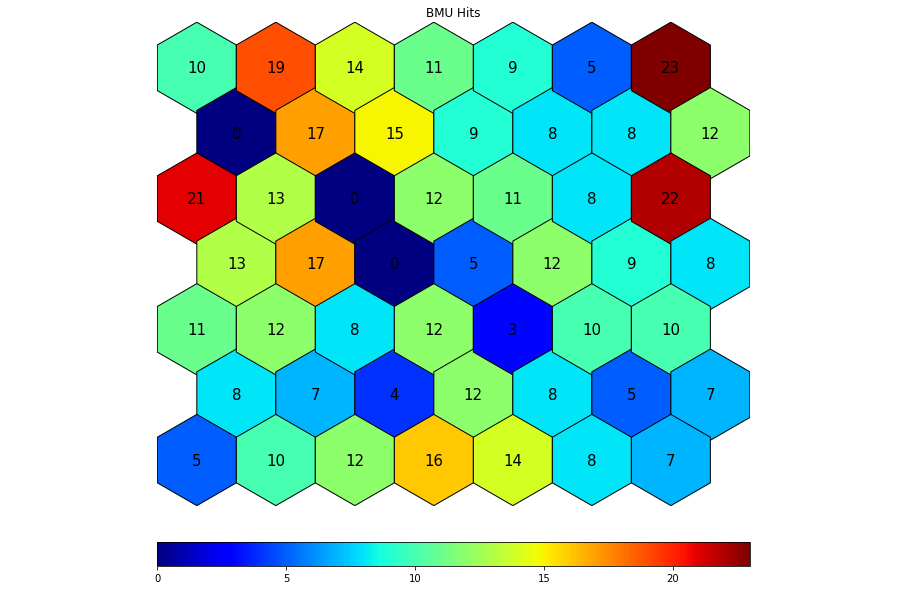

In [25]:
from bmuhits import BmuHitsView
vhts  = BmuHitsView(16,10,"Hits by neuron",text_size=20)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=15, logaritmic=False)

 - **Affichage de la carte (distances entre les référents/neurones)**

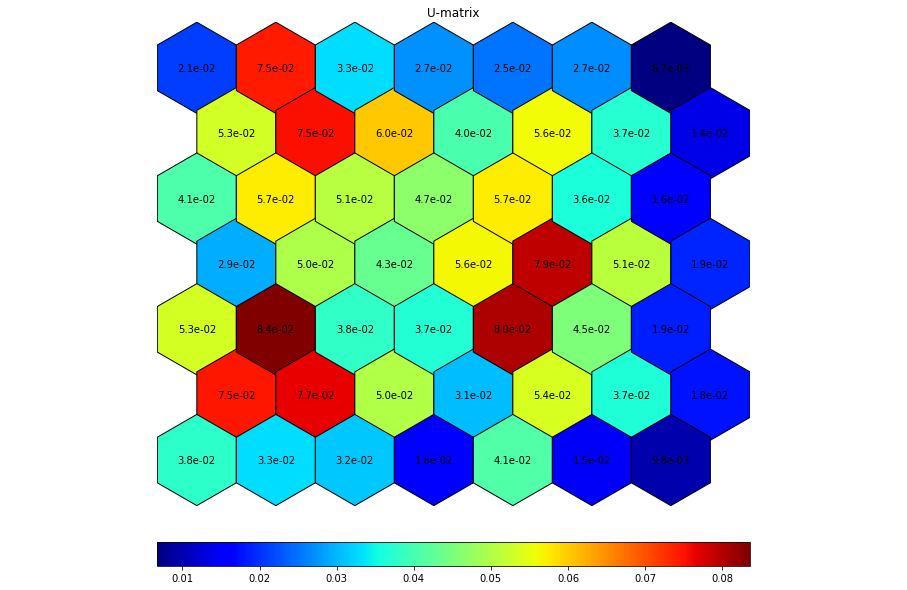

In [26]:
from umatrix import UMatrixView
from matplotlib import cm
umat = UMatrixView(16,10,"Unified Distance Matrix", text_size=5,cmap=plt.get_cmap("Greys"))
umat.show(sm) ;

In [27]:
UMatrixView

umatrix.UMatrixView

#### Evaluer l'apprentissage de la carte

* **Calcul des erreurs globales**

In [28]:
topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error  = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error  = 0.734
Quantization error = 0.08920477638136232


 * **Coefficient de Silhouette**
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [29]:
# sm._bmu = sm._bmu[0].astype(int)

In [30]:
sm._bmu[0].astype(int).shape

(500,)

In [31]:
silhouette_avg = silhouette_score(sm._data, sm._bmu[0].astype(int))
silhouette_avg

0.37283949088761004

In [32]:
sm._bmu[0].astype(int)

array([11, 11,  5,  6,  2,  3,  4, 26, 27,  3,  2,  5, 20, 20, 11, 13,  5,
       27, 11,  2, 12,  9,  4, 25, 12, 11,  2, 25, 10, 18, 25, 10, 19,  9,
        9,  2,  2,  9, 25, 25, 12, 27, 10, 10,  4, 13, 20, 25, 10,  9, 10,
        4, 13, 11, 13,  5,  3,  3,  2,  2,  3,  2,  5, 26, 10, 11, 19, 11,
       11, 11,  2,  6,  3, 20,  4, 20, 20, 20,  3, 18,  3,  4,  2, 26,  9,
       10, 25,  9,  6,  9, 20, 10,  2, 11,  3, 18, 20,  3, 25, 27, 13, 18,
       26,  3,  5,  2, 10, 27, 12,  4,  4, 13, 20, 10,  2, 25, 10, 19, 12,
       13,  9, 10,  3, 10, 19,  6,  3,  9, 11,  2, 25, 27,  4, 13, 27,  2,
        6, 13,  2,  4, 13, 10, 18,  2,  5, 18,  9, 10, 20,  2,  2, 18, 18,
       25,  9,  9, 26, 10,  5,  2, 25, 26, 12,  4, 12, 20, 27,  8, 30, 21,
       28, 28,  7, 21, 15, 14, 22, 15, 29, 23, 24, 21,  7, 14,  0, 14,  8,
       29,  8, 22,  7,  0,  8,  7, 14, 31, 24, 32, 28, 37, 23, 32,  7, 28,
       14, 38, 37, 29, 37, 31,  0, 28, 14,  7,  7, 30, 30, 21, 21, 14, 23,
        7, 30,  8,  0, 24

In [33]:
cluster_labels = sm._bmu[0].astype(int)
n_clusters = len(np.unique(sm._bmu[0].astype(int)))

In [34]:
np.unique(sm._bmu[0].astype(int))

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [35]:
sample_silhouette_values = coefficientSilhouette = silhouette_samples(sData._data, sm._bmu[0].astype(int))
sample_silhouette_values.shape

(500,)

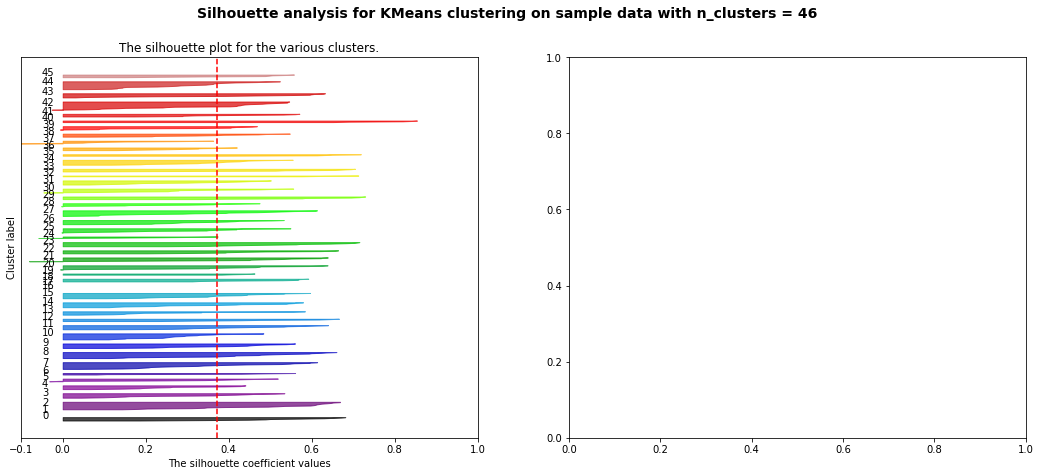

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)


# Labeling the clusters
# Draw white circles at cluster centers



plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

#### Labellisation des neurones référents à partir des labels des données

In [37]:
sm.node_labels_from_data(sData)

In [38]:
sData

In [39]:
sData.data_labels

array(['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [40]:
neuron_labels = np.array(sm.node_labels)
print(neuron_labels)

['M' 'Nan' 'T' 'T' 'T' 'T' 'T' 'M' 'M' 'T' 'T' 'T' 'T' 'T' 'M' 'M' 'Nan'
 'Nan' 'T' 'T' 'T' 'M' 'M' 'M' 'M' 'T' 'T' 'T' 'M' 'M' 'M' 'M' 'M' 'L' 'L'
 'L' 'L' 'M' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']


 - **Affichage de la carte avec etiquettes (les votes)**

In [41]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim=0, denormalize=True)

<Figure size 432x288 with 0 Axes>

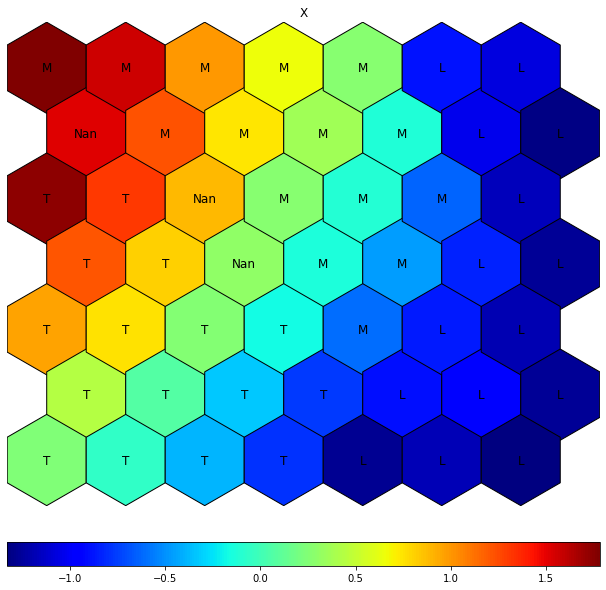

In [42]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=0, denormalize=True,labelsize=12) ; 

<Figure size 432x288 with 0 Axes>

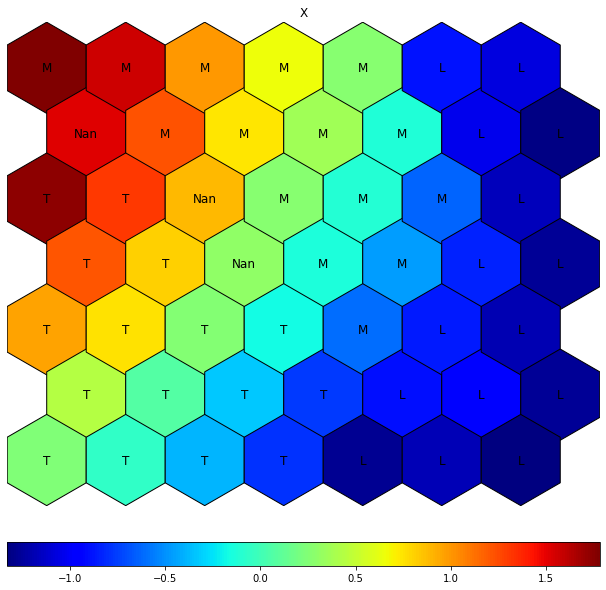

In [43]:
view2D  = View2D(16,10,
                 "lettre "+strChoixDeLaForme,
                 text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=0, denormalize=True,labelsize=12) ; 

In [44]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim=1, denormalize=True)

<Figure size 432x288 with 0 Axes>

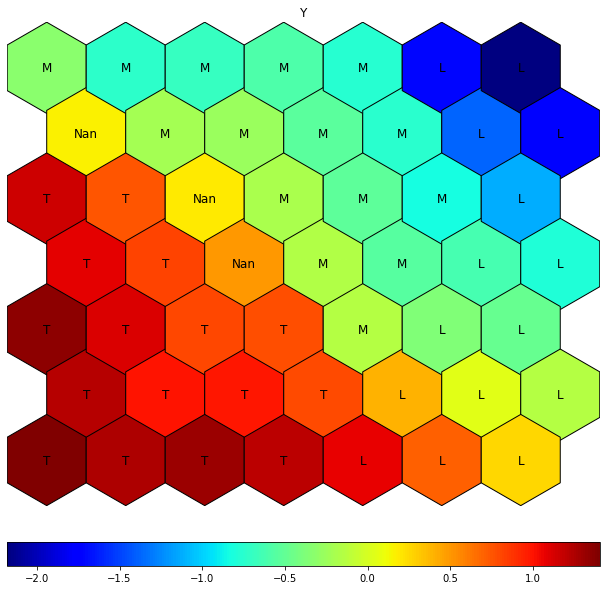

In [45]:
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=1, denormalize=True,labelsize=12) ; 

In [46]:
#view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=4, which_dim="all", denormalize=True)

<Figure size 432x288 with 0 Axes>

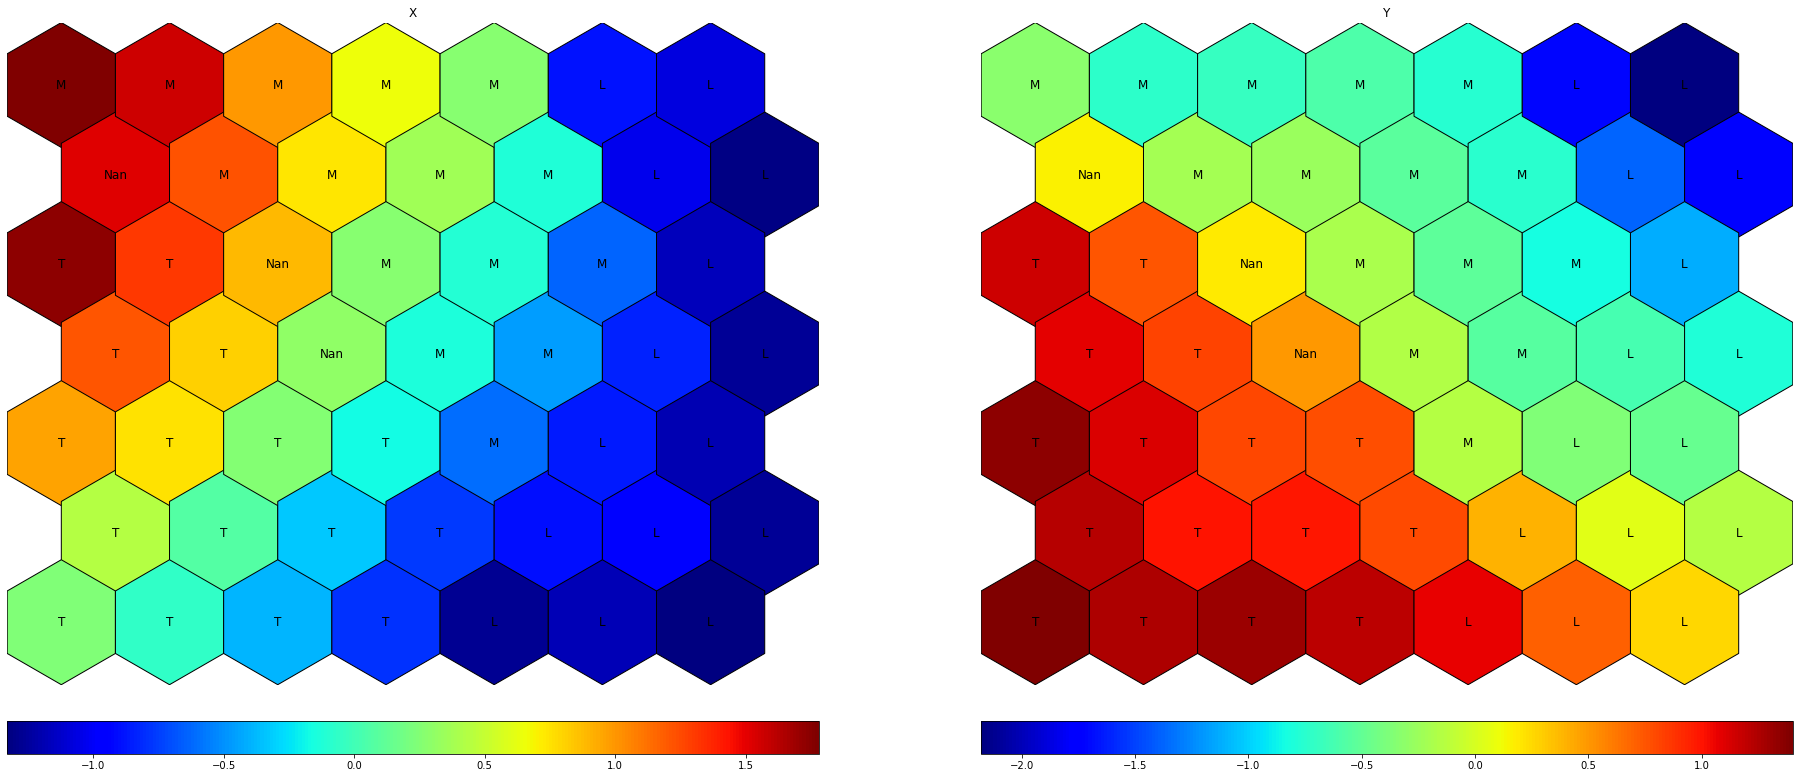

In [47]:
view2D  = View2D(32,16,
                 "lettre "+strChoixDeLaForme,
                 text_size=10)
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=2, which_dim="all", denormalize=True, labelsize=12) ;

#### Classification Ascendante Hiérarchique

 - **Affichage du dendrogramme des référents**

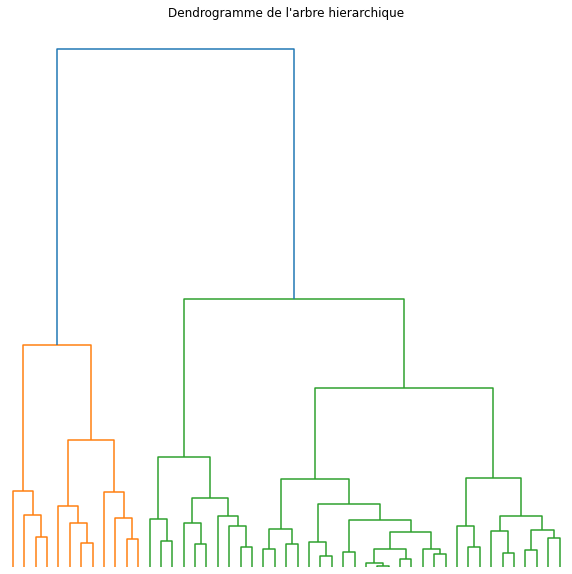

In [48]:
from dendrogram import DendrogramView
dendrogram = DendrogramView(10,10,
                            "Dendrogramme de l'arbre hierarchique",
                            text_size = 10)
dendrogram.show(sm) ; 

 - **Affichage de la carte (classes de la CAH)**

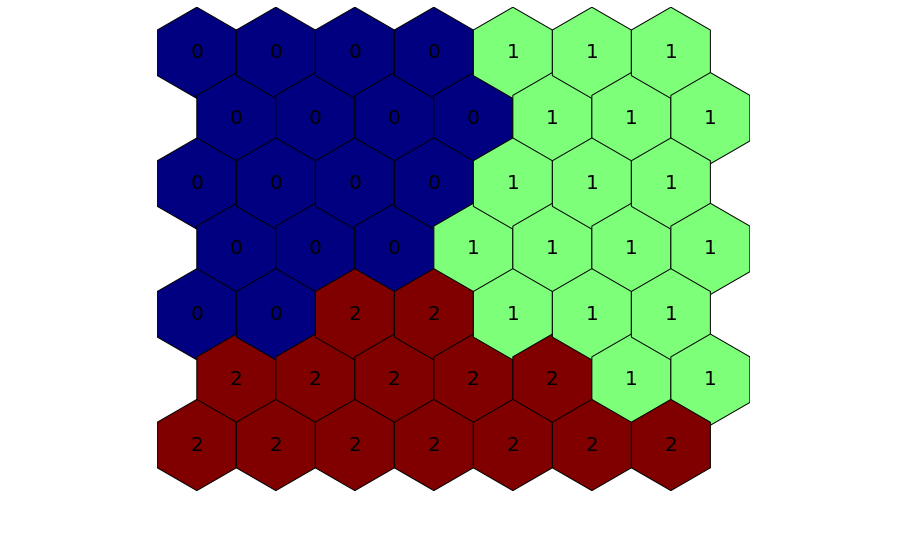

In [49]:
from hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(16,10,"Clustering",text_size=20)
a=hits.show(sm,labelsize=20)

#### Un peu de supervisé (pas toujours possible)
Comme les données sont associées à des classes, nous allons en profiter pour voir la correspondance entre les classes issues de la carte (déduites uniquement des entrées de la carte) et celles fournies avec les données.    
**On rappelle qu'il s'agit d'un algorithme non supervisé.**    
Ainsi, on ne prend pas en compte les classes lors de l'apprentissage.    
**On cherche donc à évaluer la capacité de la carte à discriminer ces classes. Cela ne pourra être fait que si les données des différentes classes sont bien distinctes dans l'espace des données (i.e. les entrées de la carte).** 

**Détermination des indices des classes estimées et désirées**

On ajoute la classe de rejet

In [50]:
classnames_ = classnames
classnames_.append('Nan')
classnames_ = np.array(classnames_)
classnames_

array(['T', 'M', 'L', 'Nan'], dtype='<U3')

Détermination des indices des classes désirées

In [69]:
_, classes_desirees = np.where(data_labels[:,None]==np.array(classnames)[None,:])
#classes_desirees

Par précaution, on recalcule les etiquettes des neurones

In [52]:
# calcul des BMU (au cas où)
sm._bmu=sm.find_bmu(sm._data) 
# camcul des etiquettes pour les neurones (votes)
sm.node_labels_from_data(sData)
# récupération des etiquetes
neuron_labels = np.array(sm.node_labels)

Détermination des indices des classes estimées

In [53]:
# classes esimees
data_labels_estim = neuron_labels[sm._bmu[0].astype(int)]
_, classes_estimees = np.where(data_labels_estim[:,None]==np.array(classnames)[None,:])
#classes_estimees

In [54]:
from sklearn.metrics.cluster import completeness_score
completeness_score(classes_desirees, data_labels_estim)

0.8519118404358004

In [55]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(classes_desirees, data_labels_estim)

0.8503813010764388

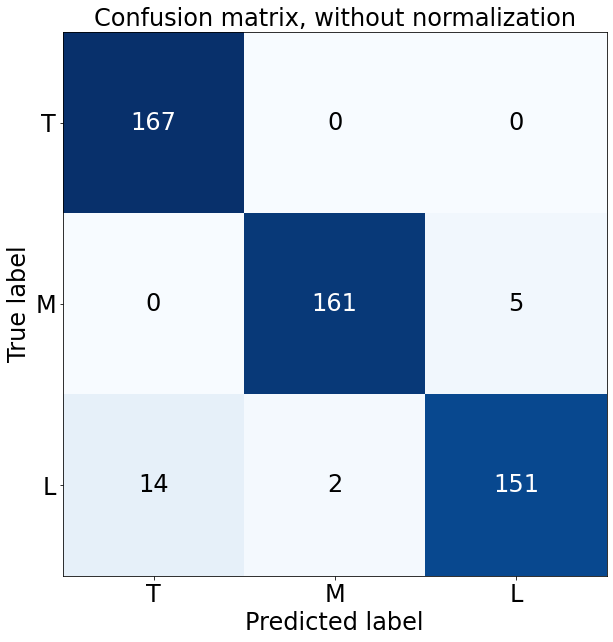

In [56]:
plt.figure(figsize=(10,10)) 
plot_confusion_matrix(classes_desirees, classes_estimees, classnames_,
                          title='',fontsize=24) ;